<a href="https://colab.research.google.com/github/julianovale/PO450/blob/main/ProjetoPO450_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Importando dados

In [ ]:
url = 'https://raw.githubusercontent.com/julianovale/PO450/main/seade/dados.csv'

df = pd.read_csv(url, delimiter = ';', decimal=',', encoding= 'Windows-1252')

# Separando atributos e atributos-alvo

In [ ]:
X = df[df.columns[3:-5]]
Y = df[['IncidCovid%','LetalidCovid%','MortalidCovid%']]

In [ ]:
ColumnsX = X.columns.ravel()
ColumnsX

array(['Pop60mais%', 'DensDem', 'RazaoSexos', 'GrauUrb', 'TxMortalidade',
       'PIBPerCapita', 'VlAdTPop', 'VlAdAPPop', 'VlAdIndPop',
       'VlAdSrvPop', 'VlAdAgrPop', 'ImpostosPop', 'ConsEElTPop',
       'ConsEEIndPop', 'ConsEECSPop', 'ConsEERurPop', 'ConsEEResPop',
       'ConsEEIlPubPop', 'FrotaVeículosPop', 'AutomóveisPop',
       'LeitosMilHab', 'LeitosSUSMilHab', 'AuxEnfMilHab', 'EnfMilHab',
       'MedMilHab', 'TecEnfMilHab', 'EmpFormPop', 'RazaoEmpSexo',
       'RendMedEmpregos', 'IDH-M', 'IDH-Long', 'IDH-Educ', 'IDH-Renda',
       'RendaPCapita', 'DomMeioSMPC%', 'DomQuarSMPC%', 'Agua%', 'Lixo%',
       'Esgoto%'], dtype=object)

In [ ]:
ColumnsY = Y.columns.ravel()
ColumnsY

array(['IncidCovid%', 'LetalidCovid%', 'MortalidCovid%'], dtype=object)

# Normalizando dados e separando Ys

In [ ]:
scaler = MinMaxScaler()
X_Normal = scaler.fit_transform(X)
Y_Normal = scaler.fit_transform(Y)

In [ ]:
dfY = pd.DataFrame(Y_Normal)
Y_I = dfY[0].to_numpy()
Y_L = dfY[1].to_numpy()
Y_M = dfY[2].to_numpy()

# Convertendo novamente em DataFrame

In [ ]:
X_Normal_df = pd.DataFrame(X_Normal, columns=ColumnsX)
Y_Normal_df = pd.DataFrame(Y_Normal, columns=ColumnsY)

In [ ]:
X_Normal_df.describe()

,Pop60mais%,DensDem,RazaoSexos,GrauUrb,TxMortalidade,PIBPerCapita,VlAdTPop,VlAdAPPop,VlAdIndPop,VlAdSrvPop,VlAdAgrPop,ImpostosPop,ConsEElTPop,ConsEEIndPop,ConsEECSPop,ConsEERurPop,ConsEEResPop,ConsEEIlPubPop,FrotaVeículosPop,AutomóveisPop,LeitosMilHab,LeitosSUSMilHab,AuxEnfMilHab,EnfMilHab,MedMilHab,TecEnfMilHab,EmpFormPop,RazaoEmpSexo,RendMedEmpregos,IDH-M,IDH-Long,IDH-Educ,IDH-Renda,RendaPCapita,DomMeioSMPC%,DomQuarSMPC%,Agua%,Lixo%,Esgoto%
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,0.393308,0.003470,0.047954,0.825974,0.365873,0.058490,0.053099,0.227762,0.024517,0.087374,0.098302,0.065079,0.010937,0.005657,0.105050,0.035612,0.302675,0.070107,0.515674,0.411048,0.043864,0.042511,0.201069,0.158294,0.120701,0.140998,0.127664,0.179320,0.264941,0.450794,0.530367,0.512578,0.416344,0.288270,0.304499,0.218248,0.941093,0.946208,0.898020
std,0.164171,0.040492,0.052058,0.179431,0.091742,0.073534,0.063819,0.131098,0.054336,0.100546,0.108457,0.107314,0.040078,0.040120,0.092024,0.057644,0.126317,0.054980,0.176386,0.139075,0.073441,0.077964,0.141316,0.084755,0.144908,0.080793,0.094377,0.105439,0.115122,0.145638,0.190854,0.158659,0.134684,0.111780,0.165713,0.144487,0.110126,0.087887,0.160499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279029,0.000056,0.033512,0.771567,0.308219,0.025144,0.024643,0.144869,0.003888,0.038771,0.024784,0.015987,0.004464,0.000220,0.045815,0.009435,0.225468,0.046534,0.394742,0.322288,0.000000,0.000000,0.096774,0.101010,0.027845,0.087209,0.066340,0.119516,0.184414,0.358744,0.373913,0.406557,0.331104,0.218843,0.193548,0.126364,0.943905,0.939567,0.889561
50%,0.386434,0.000126,0.041165,0.885649,0.363503,0.040964,0.039156,0.183276,0.010154,0.061958,0.066558,0.034845,0.007057,0.001237,0.082047,0.023395,0.288211,0.064658,0.518127,0.419710,0.022166,0.020193,0.168683,0.142191,0.070218,0.133037,0.108551,0.154852,0.239005,0.443946,0.539130,0.518033,0.414716,0.275927,0.276698,0.178458,0.978641,0.968073,0.966318
75%,0.489852,0.000461,0.049991,0.947077,0.417808,0.067453,0.060697,0.272785,0.027431,0.101020,0.142793,0.069594,0.010838,0.004073,0.128236,0.045062,0.360476,0.082992,0.647380,0.505842,0.067448,0.060578,0.268145,0.198912,0.165860,0.179891,0.162416,0.201788,0.323621,0.547085,0.678261,0.619672,0.494983,0.341634,0.380285,0.269623,0.991586,0.988597,0.986074
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_Normal_df.shape

(645, 39)

In [ ]:
Y_Normal_df.describe()

,IncidCovid%,LetalidCovid%,MortalidCovid%
count,645.000000,645.000000,645.000000
mean,0.321150,0.119016,0.300566
std,0.133564,0.067418,0.139863
min,0.000000,0.000000,0.000000
25%,0.229580,0.080283,0.208660
50%,0.312784,0.110542,0.291131
75%,0.400044,0.143161,0.381080
max,1.000000,1.000000,1.000000


# Verificando correlações

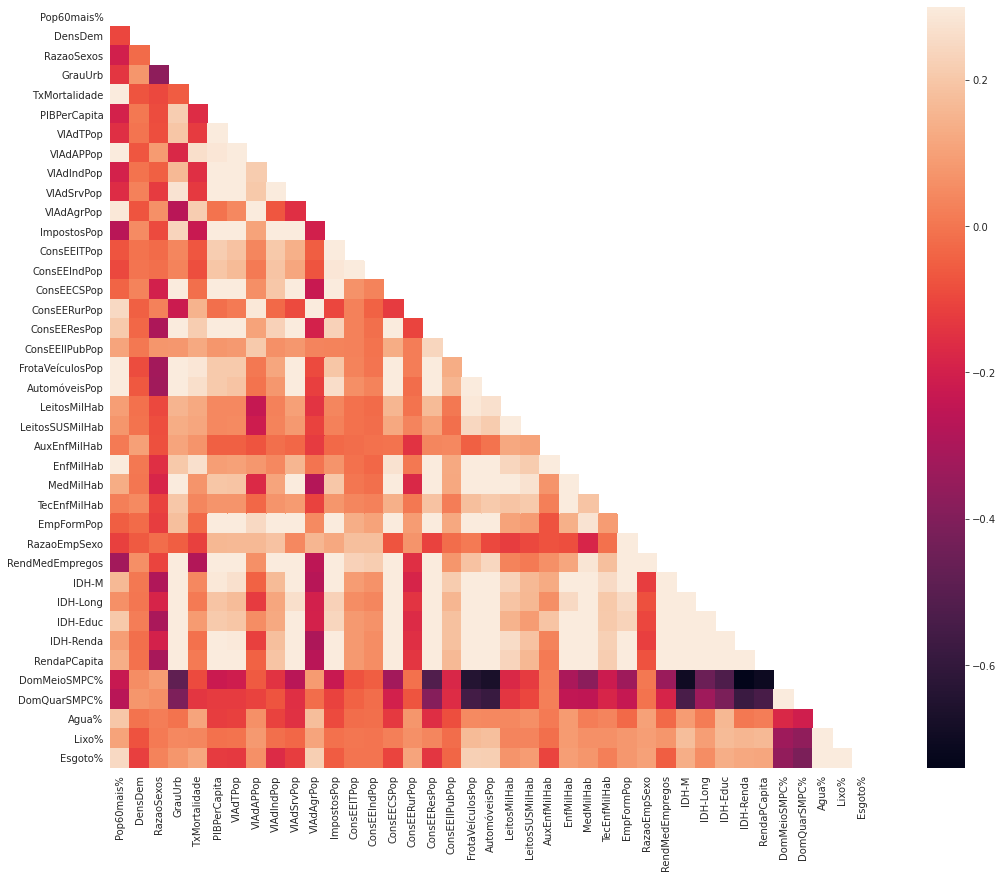

In [ ]:
corr = X_Normal_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 14))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

# Coeficiente de silhueta

In [ ]:
faixa_n_clusteres = [i for i in range(2,11)]
valores_silhueta = []
for k in faixa_n_clusteres:
  agrupador = KMeans(n_clusters=k)
  labels = agrupador.fit_predict(X_Normal_df)
  media_silhueta = silhouette_score(X_Normal_df, labels)
  valores_silhueta.append(media_silhueta) 


fig = go.Figure()
fig.add_trace(go.Scatter(x=faixa_n_clusteres, y=valores_silhueta))
fig.update_layout(
    title = 'Valores médios de silhueta',
    xaxis_title = 'número de clusteres',
    yaxis_title='valor médio de silhueta')

# Clusterizando

In [ ]:
agrupador = KMeans(n_clusters = 2)
agrupador.fit(X_Normal_df)
labels = agrupador.labels_
print(labels)
type(labels)

[1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1
 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0
 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0
 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1
 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0
 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0
 0 0 0 0 1 0 0 1 1 1 0 0 

numpy.ndarray

# Componentes principais - 2 Componentes

In [ ]:
# duas componentes
pca_model = PCA(n_components=2)
pcaZ = pca_model.fit_transform(X_Normal_df)
pcaZ = pd.DataFrame(pcaZ, columns=['Componente_1', 'Componente_2'])
pcaZ

,Componente_1,Componente_2
0,0.696401,-0.223432
1,0.188479,-0.316557
2,-0.113061,0.040064
3,0.340203,-0.082698
4,0.308541,-0.017357
...,...,...
640,0.200052,0.035568
641,-0.125462,-0.256391
642,0.232251,0.118773
643,0.735484,-0.097498


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



Text(0, 0.5, 'Explicação (%)')

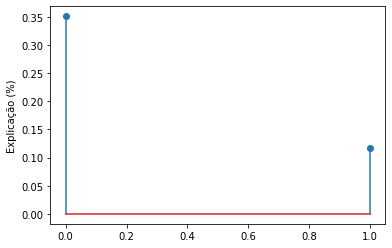

In [ ]:
perfil_autovalores = pca_model.explained_variance_ratio_
plt.stem(perfil_autovalores)
plt.ylabel("Explicação (%)")

In [ ]:
localidades = df['Localidade']
localidades

0                Adamantina
1                    Adolfo
2                     Aguaí
3            Águas da Prata
4          Águas de Lindóia
               ...         
640    Vista Alegre do Alto
641          Vitória Brasil
642              Votorantim
643             Votuporanga
644                Zacarias
Name: Localidade, Length: 645, dtype: object

# Plotando Clusters X PCA

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = pcaZ['Componente_1'], y = pcaZ['Componente_2'],
                         mode='markers', 
                         marker=dict(color=agrupador.labels_.astype(np.float)), 
                         text = localidades))
fig.update_layout(xaxis_title='Componente 1', yaxis_title='Componente 2')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = pcaZ['Componente_1'], y = pcaZ['Componente_2'],
                         mode='markers', 
                         marker=dict(color=agrupador.labels_.astype(np.float)), 
                         text = labels))
fig.update_layout(xaxis_title='Componente 1', yaxis_title='Componente 2')
fig.show()

In [ ]:
# três componentes
pca_model = PCA(n_components=3)
pcaZ = pca_model.fit_transform(X_Normal_df)
pcaZ = pd.DataFrame(pcaZ, columns=['Componente_1', 'Componente_2', 'Componente_3'])
pcaZ

,Componente_1,Componente_2,Componente_3
0,0.696401,-0.223432,-0.223683
1,0.188479,-0.316557,-0.034200
2,-0.113061,0.040064,0.076774
3,0.340203,-0.082698,-0.238671
4,0.308541,-0.017357,-0.096160
...,...,...,...
640,0.200052,0.035568,0.422839
641,-0.125462,-0.256391,0.200579
642,0.232251,0.118773,-0.003674
643,0.735484,-0.097498,-0.156957


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



Text(0, 0.5, 'Explicação (%)')

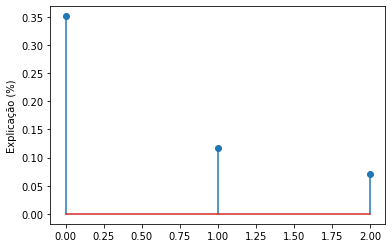

In [ ]:
perfil_autovalores = pca_model.explained_variance_ratio_
plt.stem(perfil_autovalores)
plt.ylabel("Explicação (%)")

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = pcaZ['Componente_1'], y = pcaZ['Componente_2'], z = pcaZ['Componente_3'], 
                           mode = 'markers',
                           marker = dict(color = labels.astype(np.float)),
                           text = localidades))
fig.update_layout(scene=dict(xaxis_title='Componente 1', yaxis_title='Componente 2', zaxis_title='Componente 3'))
fig.show()

In [ ]:
Y

,IncidCovid%,LetalidCovid%,MortalidCovid%
0,8.249248,3.040057,0.250782
1,13.025820,2.449889,0.319118
2,7.144462,3.144654,0.224669
3,6.374247,4.225352,0.269334
4,8.533798,2.232143,0.190487
...,...,...,...
640,8.173197,1.526718,0.124782
641,10.170455,3.910615,0.397727
642,7.065363,4.382235,0.309621
643,12.938099,2.872305,0.371622


In [ ]:
Y['Localidade'] = localidades
Y['Classe'] = labels
Y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,IncidCovid%,LetalidCovid%,MortalidCovid%,Localidade,Classe
0,8.249248,3.040057,0.250782,Adamantina,1
1,13.025820,2.449889,0.319118,Adolfo,1
2,7.144462,3.144654,0.224669,Aguaí,0
3,6.374247,4.225352,0.269334,Águas da Prata,1
4,8.533798,2.232143,0.190487,Águas de Lindóia,1
...,...,...,...,...,...
640,8.173197,1.526718,0.124782,Vista Alegre do Alto,1
641,10.170455,3.910615,0.397727,Vitória Brasil,0
642,7.065363,4.382235,0.309621,Votorantim,1
643,12.938099,2.872305,0.371622,Votuporanga,1


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



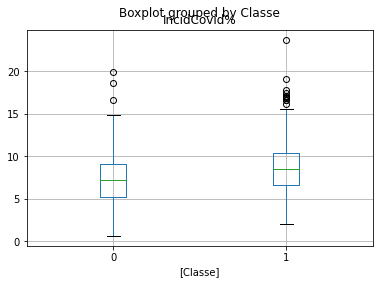

In [ ]:
dfbp = Y[['Classe', 'IncidCovid%']].copy()
dfbp.boxplot(by='Classe');

In [ ]:
grouped_df = Y.groupby("Classe")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
print(mean_df)

   Classe  IncidCovid%  LetalidCovid%  MortalidCovid%
0       0     7.224066       2.942076        0.190099
1       1     8.770984       3.005861        0.246368
